<a href="https://colab.research.google.com/github/Dhanush-adk/machine_learning/blob/main/assignment_6/assignment_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

time: 878 µs (started: 2023-11-30 20:55:52 +00:00)


In [35]:
#Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/Dhanush-adk/machine_learning/main/assignment_2/Housing.csv#'
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


time: 167 ms (started: 2023-11-30 20:55:53 +00:00)


In [36]:
df['furnishingstatus'].value_counts().unique
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


time: 42.2 ms (started: 2023-11-30 20:55:54 +00:00)


In [37]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=False)
df = df.drop('furnishingstatus_semi-furnished', axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,1,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,0,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,1,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,1,0


time: 53.8 ms (started: 2023-11-30 20:55:55 +00:00)


In [38]:
binary_columns = df.select_dtypes(include=['object']).columns
binary_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

time: 14.2 ms (started: 2023-11-30 20:55:55 +00:00)


In [39]:
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0


time: 49.4 ms (started: 2023-11-30 20:55:56 +00:00)


In [40]:
df.shape

(545, 14)

time: 3.66 ms (started: 2023-11-30 20:55:56 +00:00)


In [41]:
from sklearn.preprocessing import MinMaxScaler

time: 492 µs (started: 2023-11-30 20:55:57 +00:00)


In [42]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

time: 736 µs (started: 2023-11-30 20:55:58 +00:00)


In [43]:
X = df.drop('price', axis = 1)
y = df[['price']]

time: 16.7 ms (started: 2023-11-30 20:55:58 +00:00)


In [44]:
X = pd.DataFrame(scaler_x.fit_transform(X), columns=X.columns, index=X.index).values
y = pd.DataFrame(scaler_y.fit_transform(y), columns=y.columns, index=y.index).values

time: 18.5 ms (started: 2023-11-30 20:55:59 +00:00)


In [45]:
train_X, val_X, train_Y, val_Y = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = torch.tensor(train_X)
y_train =  torch.tensor(train_Y)
X_val =  torch.tensor(val_X)
y_val =  torch.tensor(val_Y)

time: 11.4 ms (started: 2023-11-30 20:55:59 +00:00)


In [46]:
training_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

time: 4.54 ms (started: 2023-11-30 20:56:01 +00:00)


In [47]:
val_data = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_data, batch_size=32)

time: 781 µs (started: 2023-11-30 20:56:01 +00:00)


In [81]:
def model_train(model, criterion, optimizer, epochs, train_loader, X_val, y_val):
    loss_train = []
    loss_val = []
    for epoch in range(epochs + 1):
        # Training
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            if epoch % 500 == 0:
              print(f'Epoch {epoch}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')
              loss_val.append(val_loss)
              loss_train.append(loss)
    return loss_train, loss_val

time: 1.33 ms (started: 2023-11-30 21:18:53 +00:00)


#Problem 1.A

In [120]:
# Model 1
model1 = nn.Sequential(
    nn.Linear(X_train.shape[1], 32).to(torch.float64),
    nn.Tanh(),
    nn.Linear(32, 1).to(torch.float64)
).to(torch.float64)
optimizer1 = optim.SGD(model1.parameters(), lr=0.01)
train_loss, val_loss = model_train(model1, nn.MSELoss(), optimizer1, 5000, train_loader, X_val, y_val)

Epoch 0/5000, Training Loss: 0.03828332850578376, Validation Loss: 0.04355772255841171
Epoch 500/5000, Training Loss: 0.00527856931144302, Validation Loss: 0.013471306958488914
Epoch 1000/5000, Training Loss: 0.005898518104601255, Validation Loss: 0.013191981212979525
Epoch 1500/5000, Training Loss: 0.012657101081318475, Validation Loss: 0.01306122100001138
Epoch 2000/5000, Training Loss: 0.003569619411145632, Validation Loss: 0.012997056991740034
Epoch 2500/5000, Training Loss: 0.004028270193829579, Validation Loss: 0.012932694592173171
Epoch 3000/5000, Training Loss: 0.004529453807846796, Validation Loss: 0.012980882021747749
Epoch 3500/5000, Training Loss: 0.00843246940902794, Validation Loss: 0.012845128704130106
Epoch 4000/5000, Training Loss: 0.006148164316507526, Validation Loss: 0.012928761448649566
Epoch 4500/5000, Training Loss: 0.008743028992529994, Validation Loss: 0.012846908715930588
Epoch 5000/5000, Training Loss: 0.004115656110895304, Validation Loss: 0.0127433033496364

In [129]:
for name, param in model1.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Parameter name: 0.weight, Shape: torch.Size([32, 13])
Parameter name: 0.bias, Shape: torch.Size([32])
Parameter name: 2.weight, Shape: torch.Size([1, 32])
Parameter name: 2.bias, Shape: torch.Size([1])
time: 809 µs (started: 2023-11-30 21:38:46 +00:00)


In [130]:
total_params = sum(p.numel() for p in model1.parameters() if p.requires_grad)
print("Total number of trainable parameters ", total_params,  '\n')

Total number of trainable parameters  481 

time: 964 µs (started: 2023-11-30 21:38:47 +00:00)


In [75]:
epochs = range(0, 5001, 500)
epochs

range(0, 5001, 500)

time: 2.75 ms (started: 2023-11-30 21:15:54 +00:00)


<ipython-input-131-34725e8df6cb>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


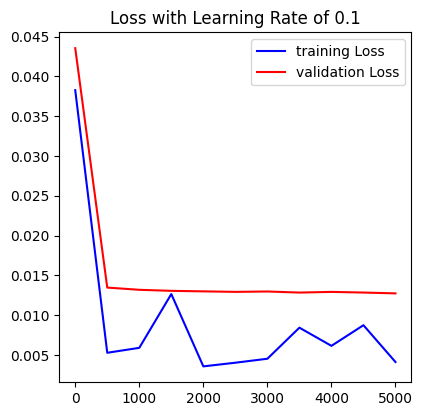

time: 397 ms (started: 2023-11-30 21:38:56 +00:00)


In [131]:
plt.figure(figsize=(10, 10))
plt.title('Loss for optimizer - SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.show()

#Problem 1.b

In [79]:
model2 = nn.Sequential(
    nn.Linear(X_train.shape[1], 32).to(torch.float64),
    nn.Tanh(),
    nn.Linear(32, 64).to(torch.float64),  # Second hidden layer with 64 neurons
    nn.Tanh(),
    nn.Linear(64, 16).to(torch.float64),  # Third hidden layer with 16 neurons
    nn.Tanh(),
    nn.Linear(16, 1).to(torch.float64) # Output layer with 1 neuron
).to(torch.float64)
criterion = nn.MSELoss()
optimizer2 = optim.SGD(model2.parameters(), lr=0.01)
train_loss_2, val_loss_2 = model_train(model2, nn.MSELoss(), optimizer2, 5000, train_loader, X_val, y_val)

Epoch 0/5000, Training Loss: 0.019049054795690593, Validation Loss: 0.04423100295452132
Epoch 500/5000, Training Loss: 0.004119459625415907, Validation Loss: 0.013513691290176896
Epoch 1000/5000, Training Loss: 0.007567202804268626, Validation Loss: 0.01326795594925644
Epoch 1500/5000, Training Loss: 0.011737487473049339, Validation Loss: 0.013328507532089398
Epoch 2000/5000, Training Loss: 0.005280328215388005, Validation Loss: 0.0131016102040083
Epoch 2500/5000, Training Loss: 0.002877494419482499, Validation Loss: 0.013111765047997413
Epoch 3000/5000, Training Loss: 0.004794850886896701, Validation Loss: 0.013017191669663346
Epoch 3500/5000, Training Loss: 0.006437373897012333, Validation Loss: 0.013108119792916218
Epoch 4000/5000, Training Loss: 0.0019501644596601967, Validation Loss: 0.013079917015629553
Epoch 4500/5000, Training Loss: 0.008462097038421152, Validation Loss: 0.012963065037098936
Epoch 5000/5000, Training Loss: 0.010132180035337782, Validation Loss: 0.01318191062831

In [128]:
for name, param in model2.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Parameter name: 0.weight, Shape: torch.Size([32, 13])
Parameter name: 0.bias, Shape: torch.Size([32])
Parameter name: 2.weight, Shape: torch.Size([64, 32])
Parameter name: 2.bias, Shape: torch.Size([64])
Parameter name: 4.weight, Shape: torch.Size([16, 64])
Parameter name: 4.bias, Shape: torch.Size([16])
Parameter name: 6.weight, Shape: torch.Size([1, 16])
Parameter name: 6.bias, Shape: torch.Size([1])
time: 1.02 ms (started: 2023-11-30 21:34:34 +00:00)


In [132]:
total_params = sum(p.numel() for p in model2.parameters() if p.requires_grad)
print("Total number of trainable parameters ", total_params,  '\n')

Total number of trainable parameters  3617 

time: 1.4 ms (started: 2023-11-30 21:39:27 +00:00)


<ipython-input-133-13cacacf0b85>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


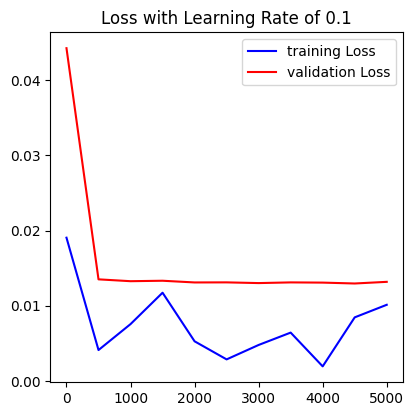

time: 240 ms (started: 2023-11-30 21:39:29 +00:00)


In [133]:
plt.figure(figsize=(10, 10))
plt.title('Loss for optimizer - SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in train_loss_2]), color='blue', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in val_loss_2]), color='red', label = 'validation Loss')
plt.title('Loss with Learning Rate of 0.1')
plt.legend()

plt.show()
